# Additional Variables

In [12]:
require(tidyverse)
require(gapminder)
require(repr)
require(scales)
require(gganimate)
require(hrbrthemes)

In [4]:
nhanes <- read_csv("Datasets/nhanes.csv")
inec <- read_csv("Datasets/INEC.csv")

### Additional Numeric Variable

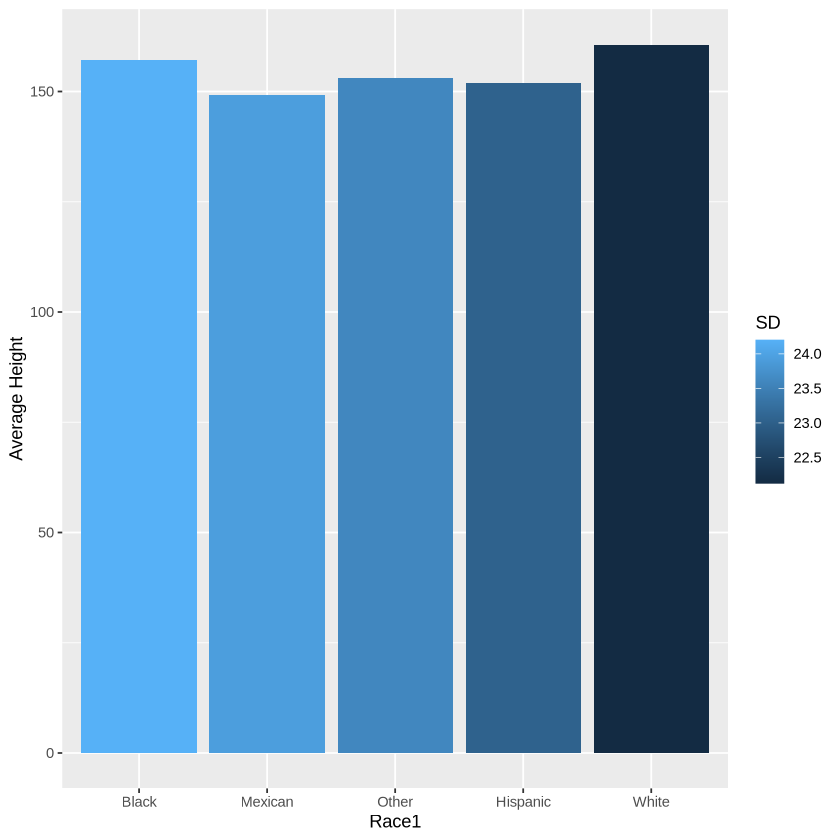

In [5]:
nhanes %>% 
    group_by(Race1) %>%
    summarise(count=n(), `Average Height`=mean(Height, na.rm=T), SD=sd(Height, na.rm=T)) %>% 
    mutate(Race1 = fct_reorder(Race1, desc(SD))) %>%
    ggplot() + 
        geom_col(aes(x=Race1, y=`Average Height`, fill=SD))

In [6]:
options(repr.plot.width=12, repr.plot.height=8)

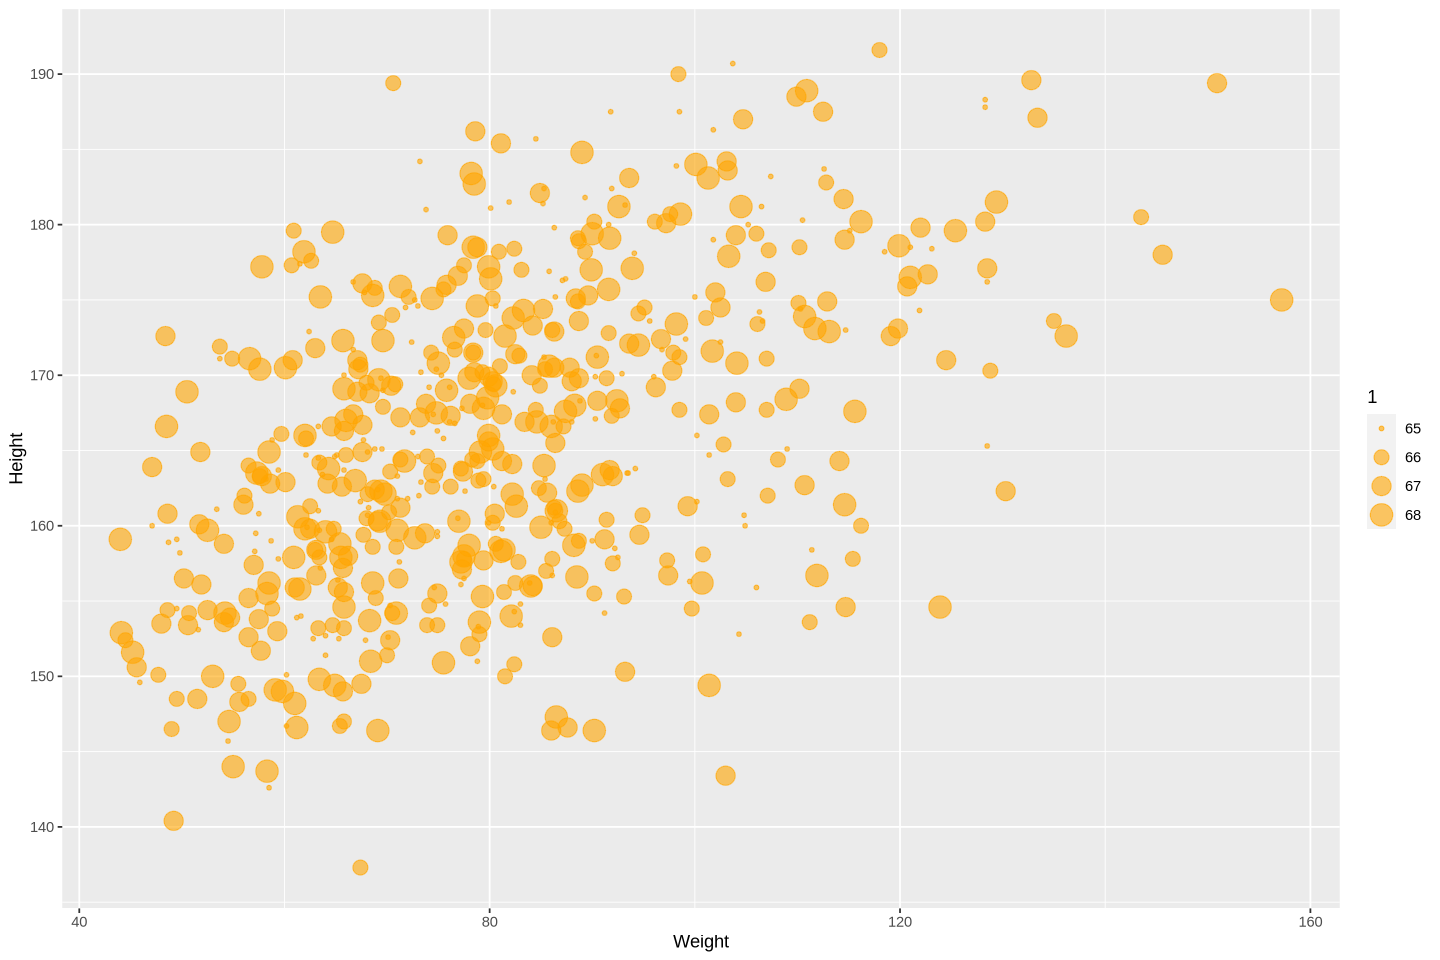

In [7]:
nhanes %>% 
    filter(!is.na(Weight) & !is.na(Height)) %>% 
    filter(Age %in% 65:68) %>% 
    ggplot() + 
        geom_point(aes(x=Weight, y=Height, size=Age), alpha=.6, col='orange') + 
        scale_size(1:10)

In [8]:
options(repr.plot.width=20, repr.plot.height=8)

### Additional Categorical Variable

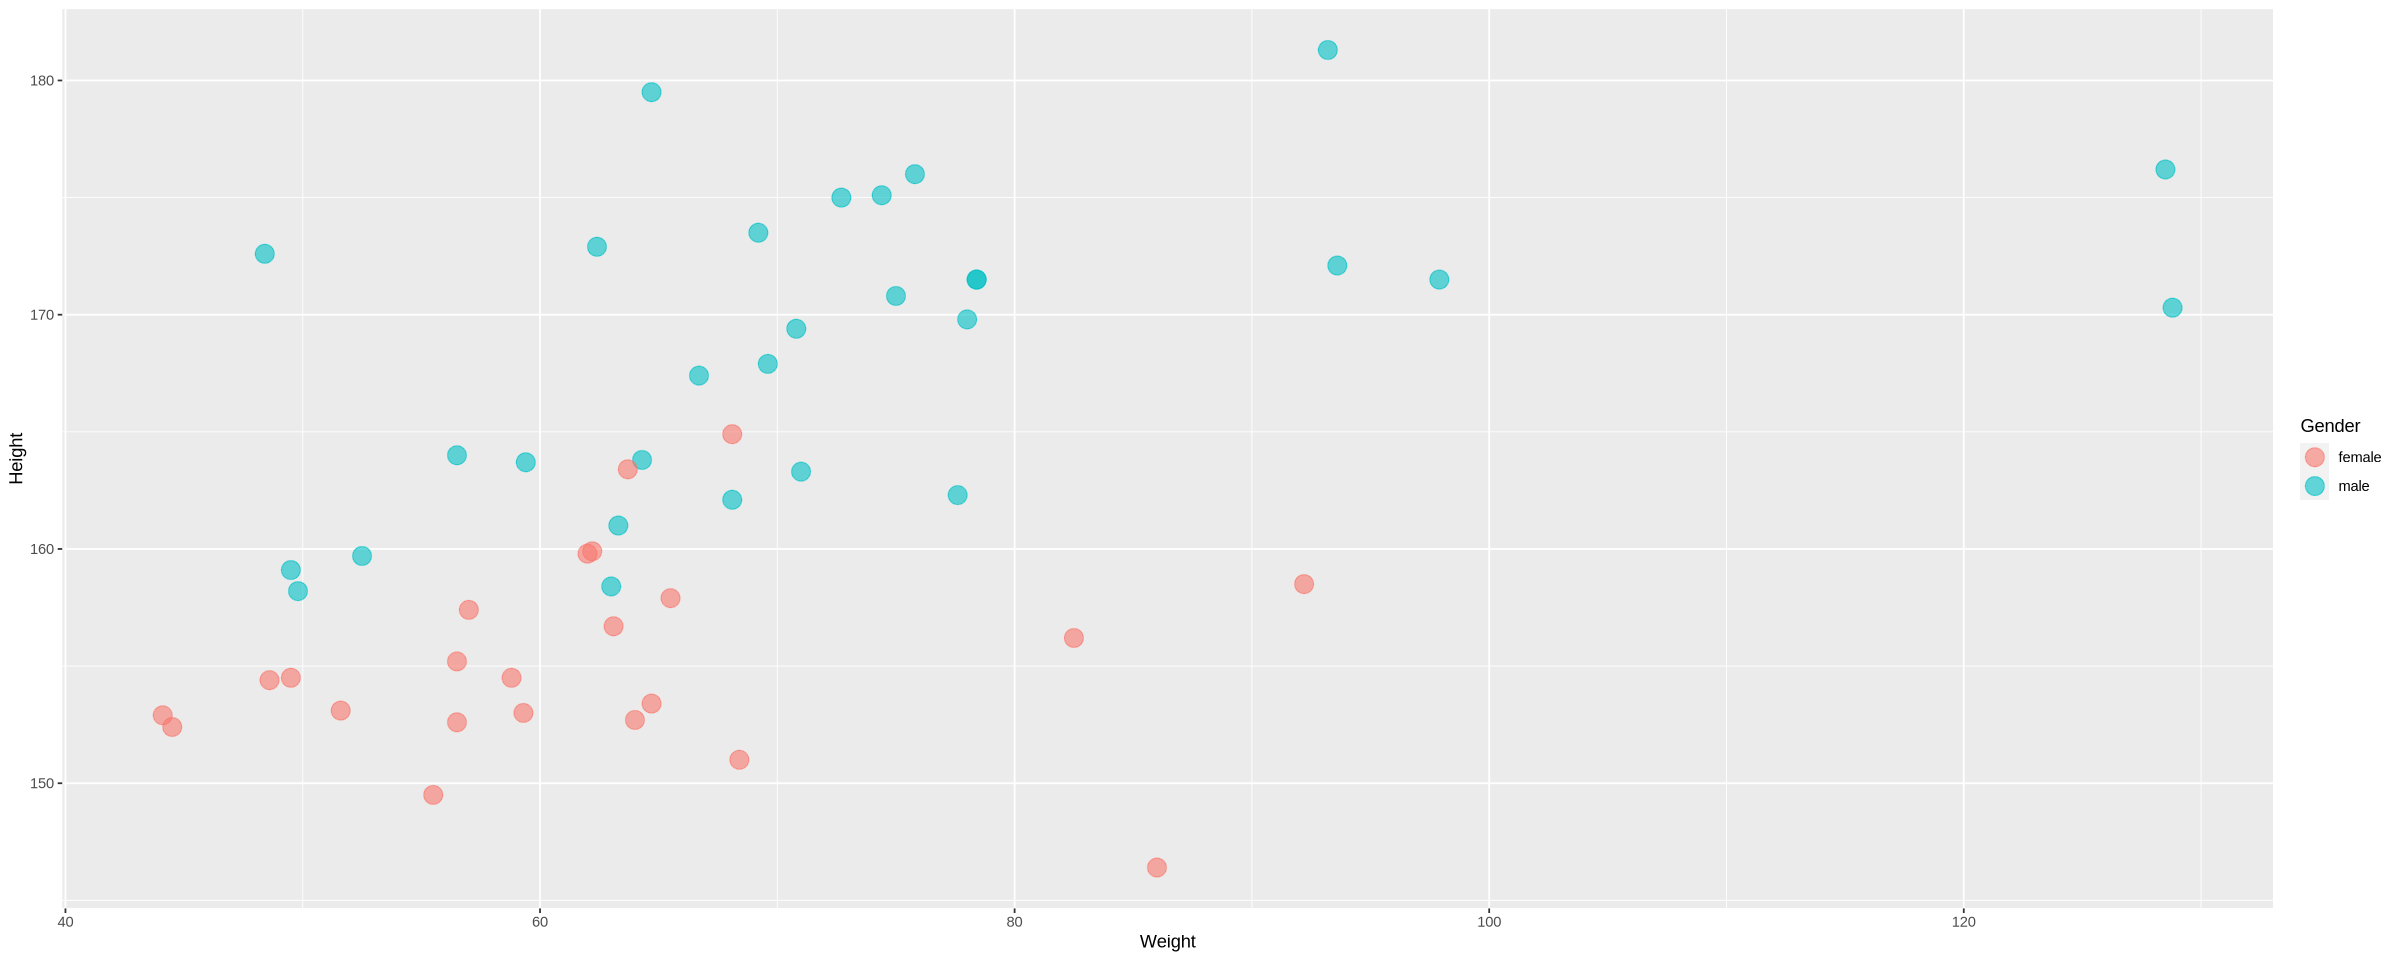

In [9]:
nhanes %>% 
    filter(!is.na(Weight) & !is.na(Height)) %>% 
    filter(Race1 == 'Other') %>%
    filter(Age %in% 65:68) %>% 
    ggplot() + 
        geom_point(aes(x=Weight, y=Height, col=Gender), alpha=.6, size=5) + 
        scale_size(1:10)

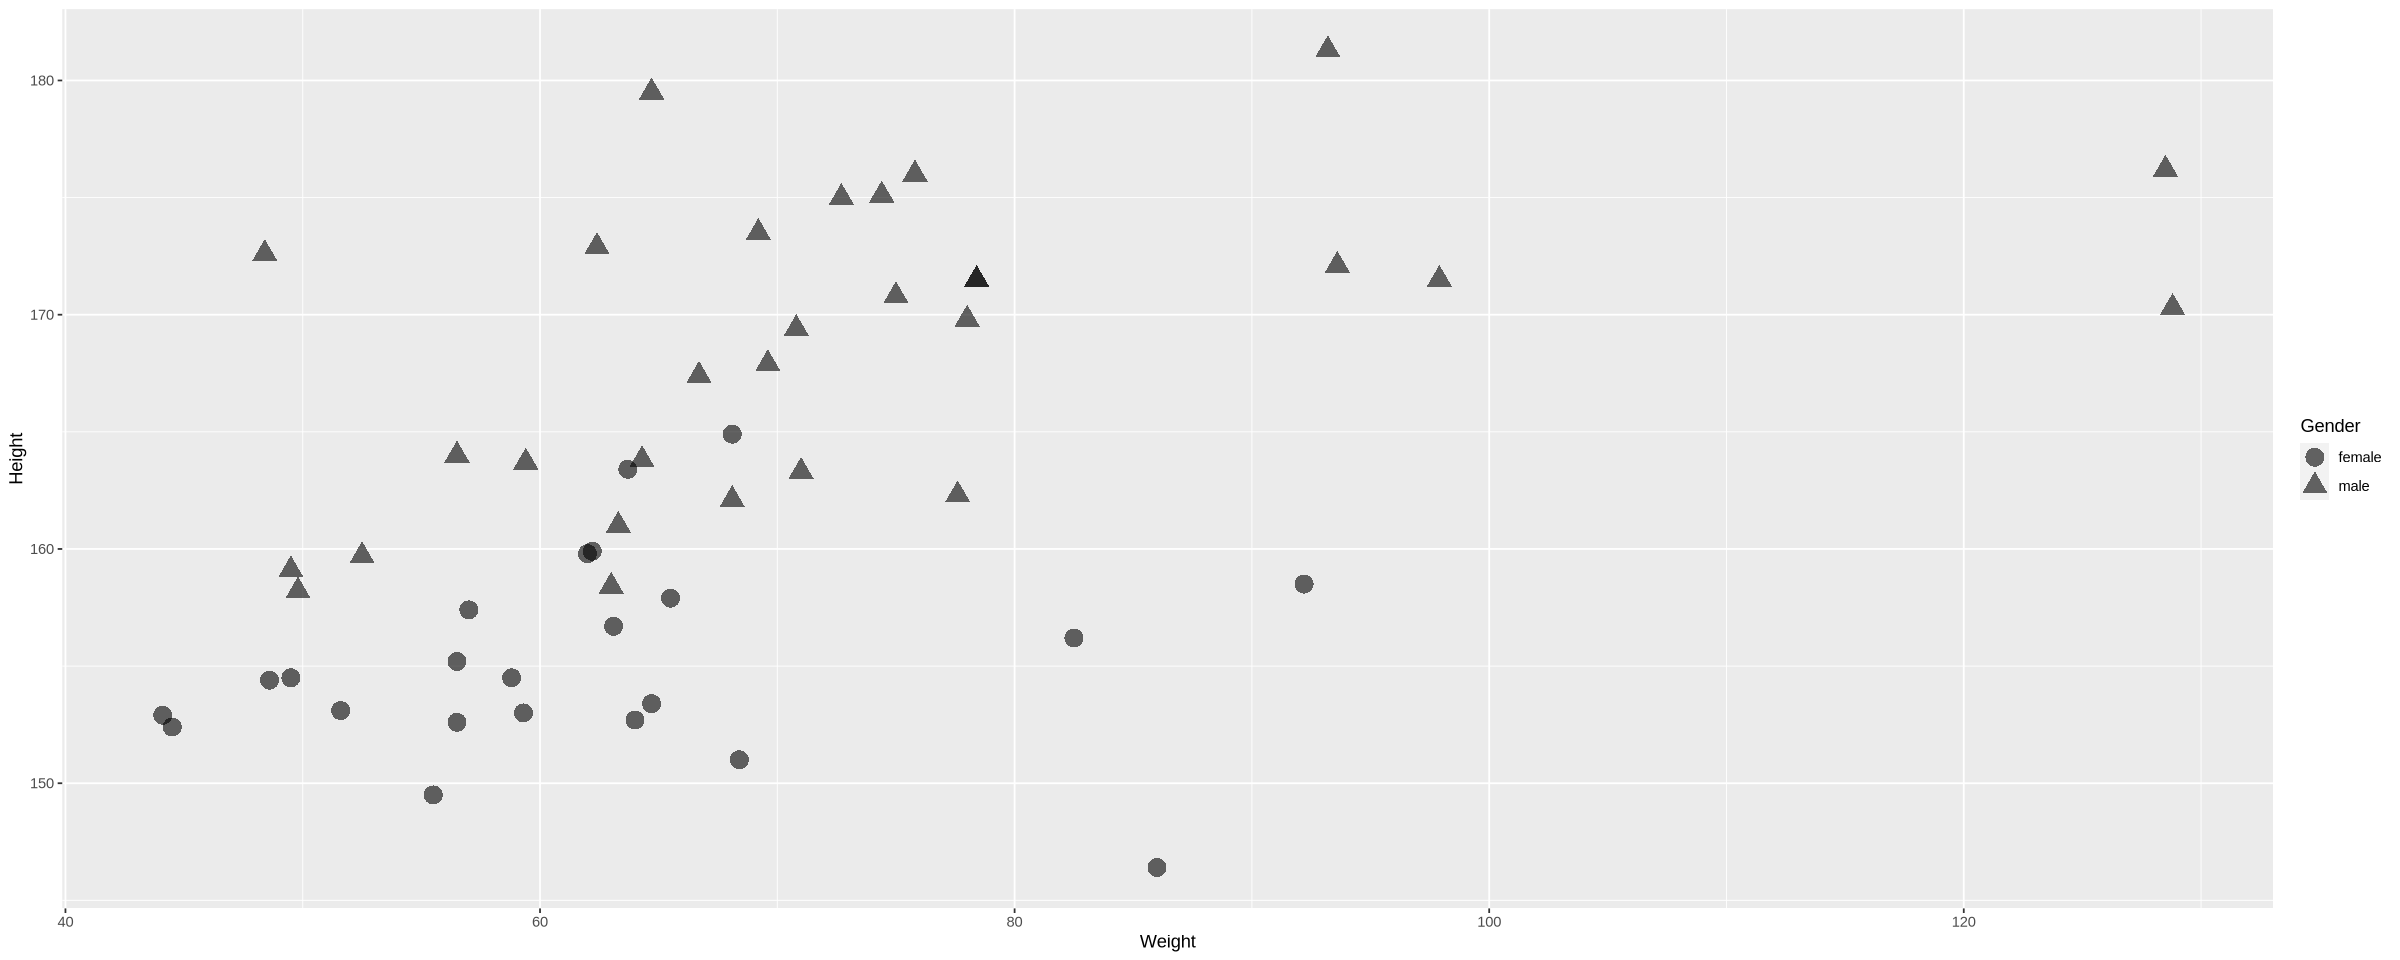

In [10]:
nhanes %>% 
    filter(!is.na(Weight) & !is.na(Height)) %>% 
    filter(Race1 == 'Other') %>%
    filter(Age %in% 65:68) %>% 
    ggplot() + 
        geom_point(aes(x=Weight, y=Height, shape=Gender), alpha=.6, size=5) + 
        scale_size(1:10)

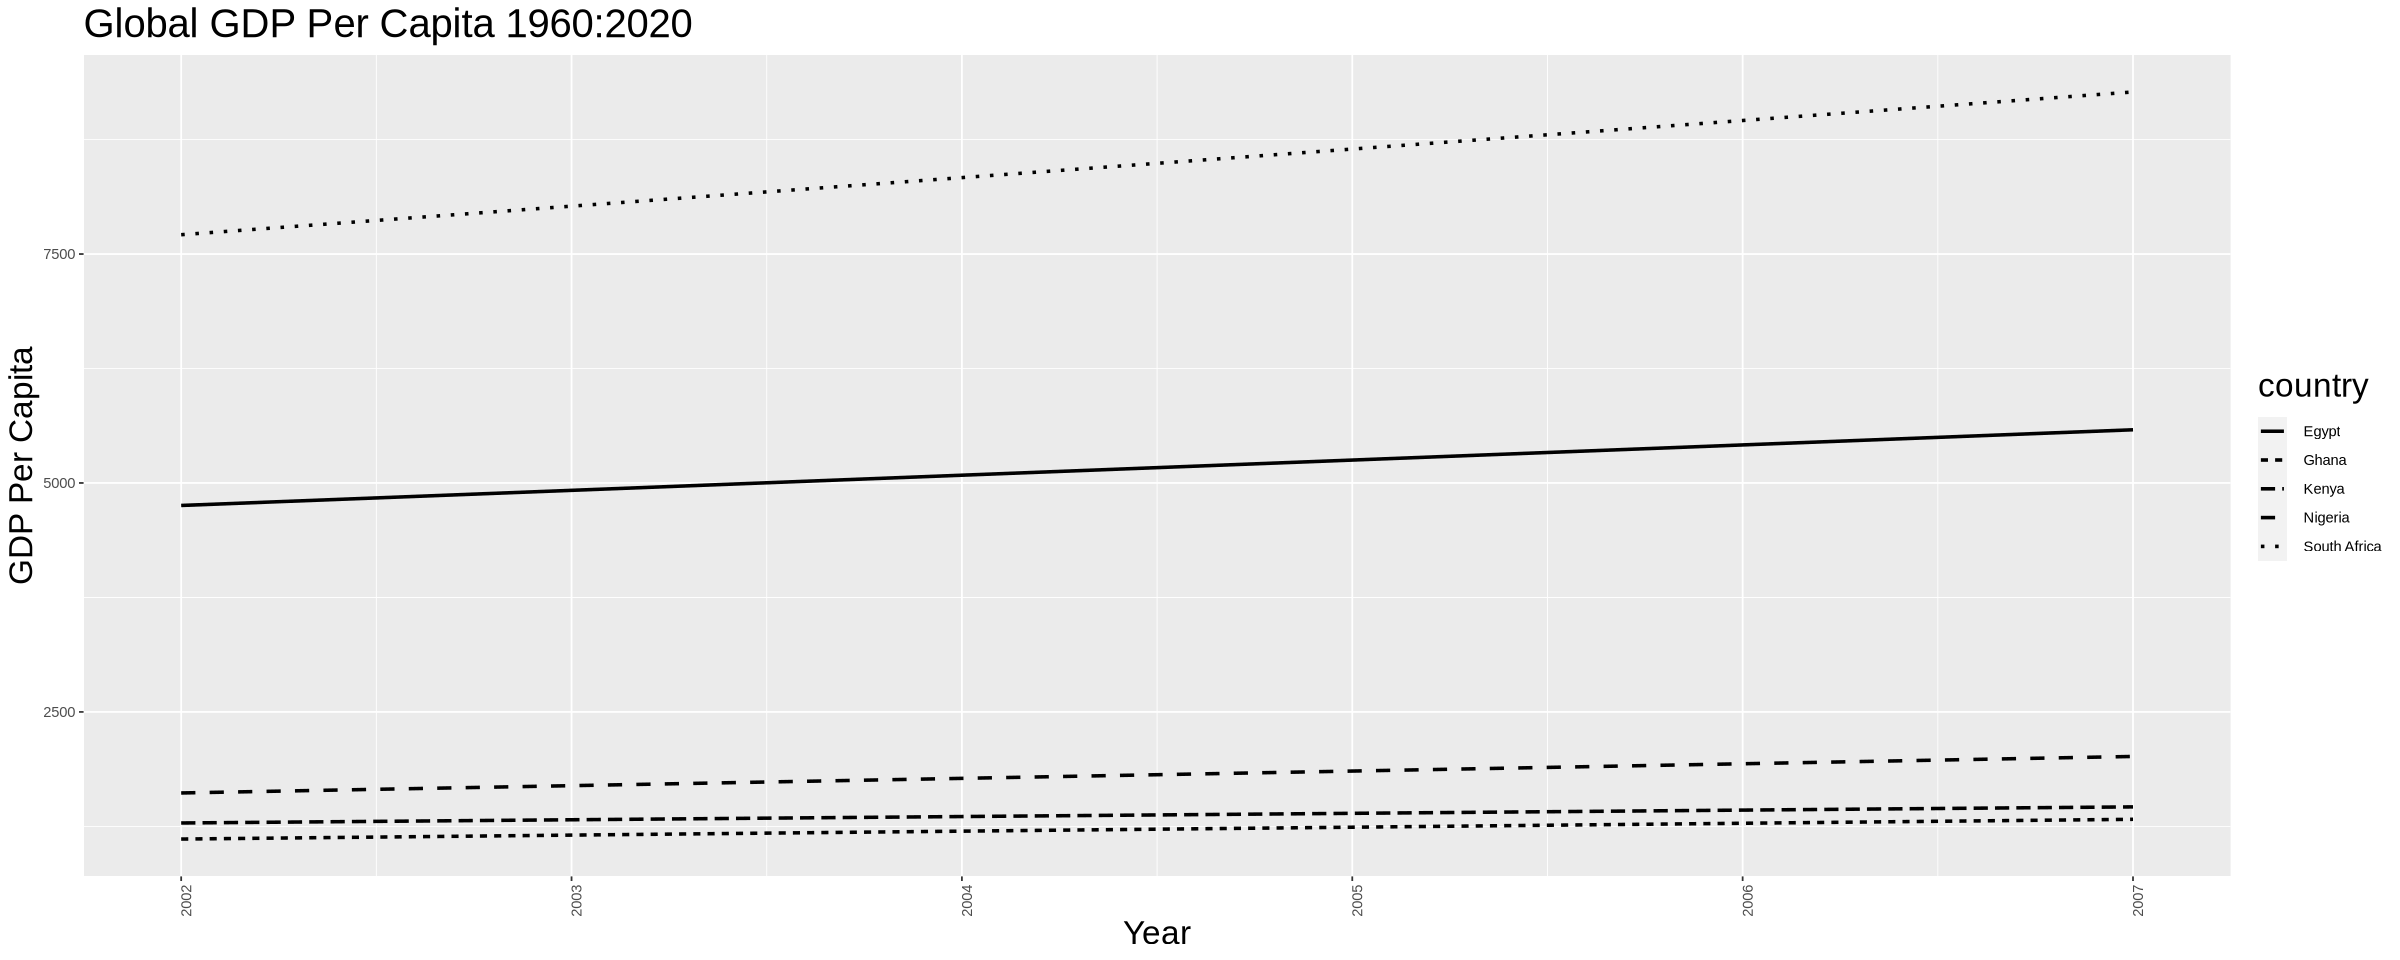

In [11]:
gapminder %>% 
    filter(country %in% c('Nigeria', 'Ghana', 'Kenya', 'South Africa', 'Egypt')) %>% 
    filter(year %in% as.character(2000:2020)) %>%
    ggplot() + 
        geom_line(aes(x=as.numeric(year), y=gdpPercap, group=country, linetype=country), lwd=1) + 
        theme(axis.text.x=element_text(angle=90)) + 
        labs(x='Year', y='GDP Per Capita', title='Global GDP Per Capita 1960:2020') + 
        theme(title=element_text(size=20))

### Additional Geographic Variable

Treat as categorical or put on a map where possible

### Additional Time Variable 

animate

In [22]:
options(repr.plot.width=16, repr.plot.height=16)

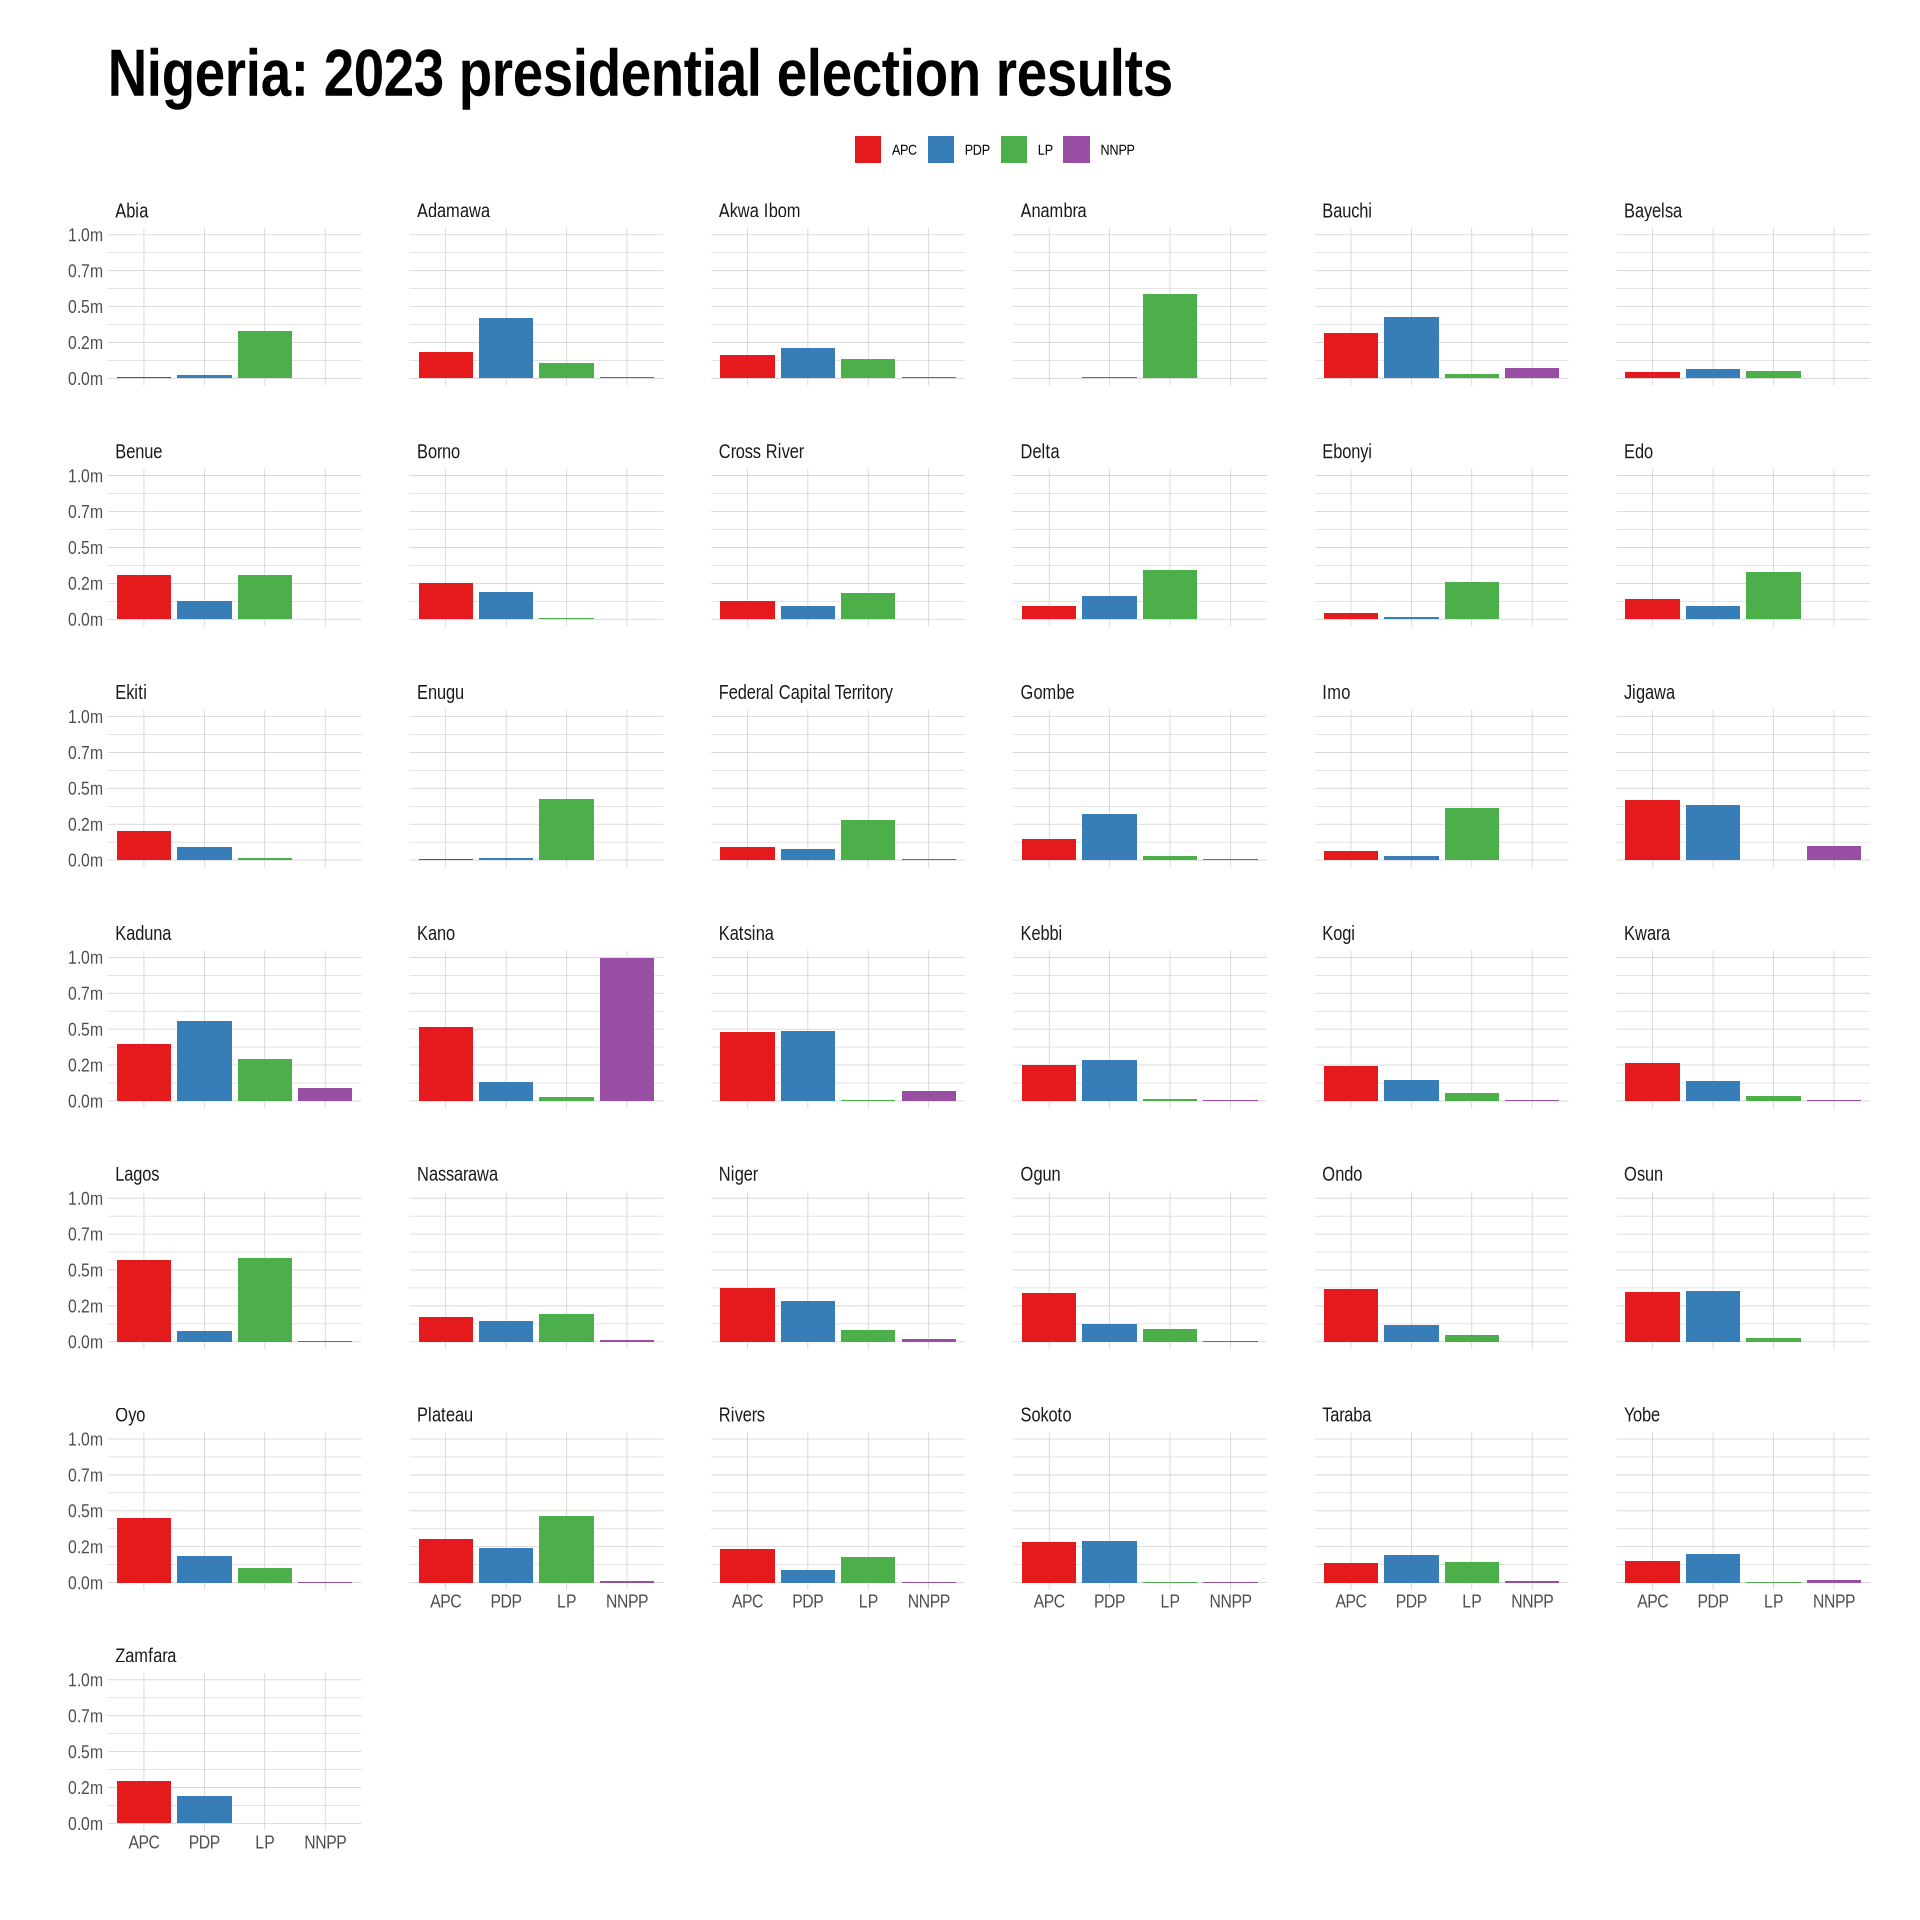

In [73]:
inec %>% 
    select(State, APC, PDP, LP, NNPP) %>% 
    pivot_longer(cols = c('APC', 'PDP', 'LP', 'NNPP'), names_to='Party', values_to='Votes') %>% 
    ggplot() + 
        geom_col(aes(x=fct_reorder(Party, desc(Votes)), y=Votes, fill=fct_reorder(Party, desc(Votes)))) + 
        scale_fill_brewer(palette='Set1') + 
        scale_y_continuous(labels=label_number(scale=1e-6, suffix='m', accuracy = .1)) + 
        labs(title='Nigeria: 2023 presidential election results', x='', y='') + 
        facet_wrap(~State, ncol=6) + 
        theme_ipsum() + 
        theme(legend.position = 'top', plot.title=element_text(size=40), legend.title=element_blank())  
